In [211]:
import calendar
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
inven_path='Data\\Inventory Dataset.xlsx'
new_inv_path='Data\\New Inventory.xlsx'

In [213]:
df_inventory=pd.read_excel(inven_path)
df_new_arrivals=pd.read_excel(new_inv_path)

## Inventory Dataset.xlsx

In [214]:
print("The Inventory dataset contains {} rows and {} columns.".format(df_inventory.shape[0],df_inventory.shape[1]))


The Inventory dataset contains 356 rows and 3 columns.


In [215]:
len(df_inventory['Item Number'].unique())

356

## New Inventory.xlsx

In [216]:
print("The New inventory dataset contains {} rows and {} columns.".format(df_new_arrivals.shape[0],df_new_arrivals.shape[1]))

The New inventory dataset contains 1039 rows and 3 columns.


In [217]:
len(df_new_arrivals['Item Number'].unique())

213

In [218]:
len(df_new_arrivals['Inventory Receive'].unique())

23

The inventory data set contains 356 unique item numbers and the number of items in that inventory. The new inventory dataset contains 1,039 rows of numbers <br> 
showing how many new items were added to inventory and when they arrived. The new inventory dataset contains 213 unique items, which means that out of 356 items,<br>
only 213 items were received on 23 different unique dates.

In [219]:

df_new_arrivals['Inventory Receive']= pd.to_datetime(df_new_arrivals['Inventory Receive'])
df_inventory['Date']=pd.to_datetime(df_inventory['Date'])
#df_inventory=df_inventory.sort_values(by=['Inventory Receive'],)

## Merging both files

In [220]:
df_merged = pd.merge(df_inventory, df_new_arrivals, on='Item Number', how='outer')
df_merged=df_merged.sort_values(by=['Inventory Receive'],ascending=True,key=lambda x: x.astype(np.int64))


In [221]:
pivot_table = df_merged.pivot_table(values='Total Item Qty', 
                             index='Item Number', 
                             columns='Inventory Receive', 
                             aggfunc='sum', 
                             fill_value=0)


In [222]:

for item_num,row in pivot_table.iterrows():
    try:
        on_stock = df_inventory[df_inventory['Item Number'] == item_num]['Inventory']
        on_stock=int(on_stock)
    except:
        on_stock=0

    for k in pivot_table.columns:
        on_stock=on_stock+row[k]
        row[k]=on_stock
        
    

C:\Users\prabh\AppData\Local\Temp\ipykernel_21064\4281683759.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  on_stock=int(on_stock)


## Visualization

In [223]:
df_merged.columns

Index(['Item Number', 'Date', 'Inventory', 'Inventory Receive',
       'Total Item Qty'],
      dtype='object')

In [224]:
df_merged["Month"]=df_merged['Inventory Receive'].dt.month

In [225]:
month_total=Inventory_Receive_sum=df_merged.groupby('Month')['Total Item Qty'].sum()

In [226]:
Inventory_sum=df_x['Inventory'].sum()
month_total[6]=Inventory_sum
month_total=month_total.sort_index(ascending=True)
month_total=pd.DataFrame(month_total)

In [227]:
month_total

,Total Item Qty
Month,
6.0,1388034.0
7.0,698592.0
8.0,726094.0
9.0,670252.0
10.0,303826.0
11.0,24848.0
12.0,63172.0


In [228]:
item_recived=month_total

In [229]:
month_names = [calendar.month_name[i] for i in range(6, 13)]

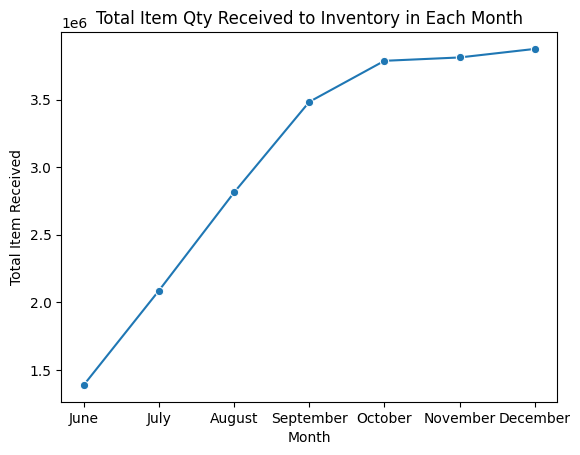

In [235]:

sns.lineplot(x=month_names, y=item_recived['Total Item Qty'], marker='o')

plt.xlabel('Month')
plt.ylabel('Total Item Received')
plt.title('Total Item Qty Received to Inventory in Each Month')

# Show the plot
plt.show()

In [231]:
for x in range(7,6+len(month_total['Total Item Qty'])):
    month_total['Total Item Qty'][x]=month_total['Total Item Qty'][x-1]+month_total['Total Item Qty'][x]

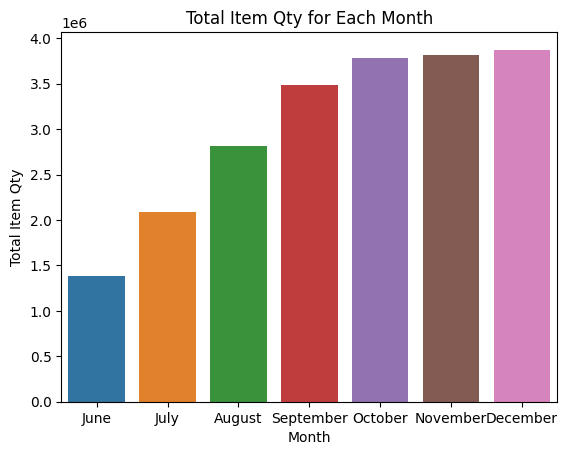

In [232]:
sns.barplot(x=month_names, y=month_total['Total Item Qty'])

plt.xlabel('Month')
plt.ylabel('Total Item Qty')
plt.title('Total Item Qty for Each Month')

plt.show()